### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')


%matplotlib inline
sns.set(style="whitegrid")


### Load the Dataset

In [3]:
df = pd.read_csv('RPL - RPL.csv')
print("Shape:", df.shape)
df.head()

Shape: (10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Data Cleaning and Preprocessing

In [4]:
# Drop irrelevant columns
df.drop(['RowNumber','Surname', 'Geography'], axis=1, inplace=True)

# Check for missing values
print("Missing values:\n", df.isna().sum())

# Remove duplicates
print("Duplicate rows:", df.duplicated().sum())
df.drop_duplicates(inplace=True)


Missing values:
 CustomerId         0
CreditScore        0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64
Duplicate rows: 0


###  Label Encoding

In [5]:
label = LabelEncoder()
df['Gender'] = label.fit_transform(df['Gender'])  # Female:0, Male:1
df.head()

,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,0,43,2,125510.82,1,1,1,79084.10,0


### Basic Info and Data Types

In [6]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   CreditScore      10000 non-null  int64  
 2   Gender           10000 non-null  int32  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int32(1), int64(8)
memory usage: 820.4 KB
None
         CustomerId   CreditScore        Gender           Age        Tenure  \
count  1.000000e+04  10000.000000  10000.000000  10000.000000  10000.000000   
mean   1.569094e+07    650.528800      0.545700     38.921800      5.

### Visual Summary: Distribution Plots

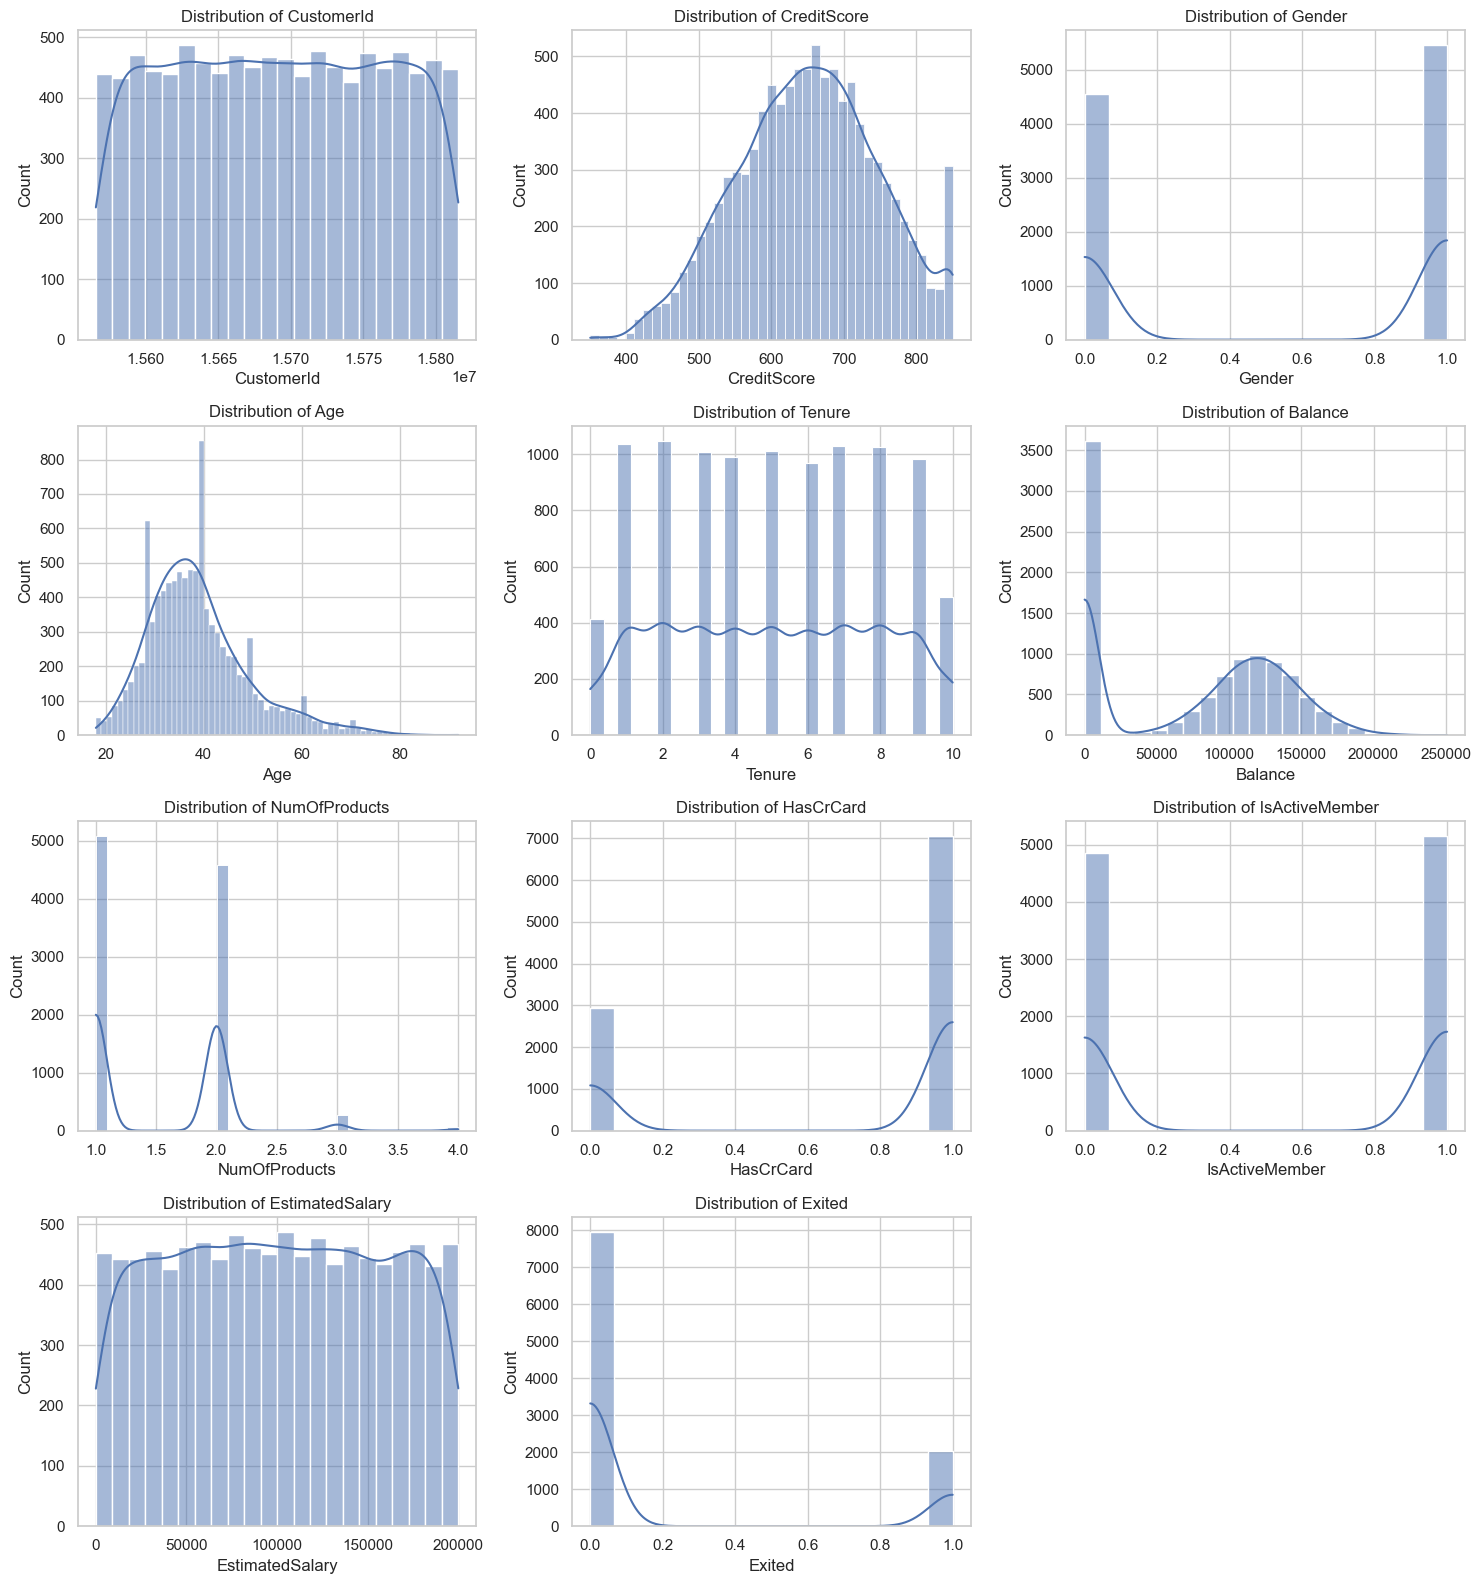

In [7]:
import math

num_cols = df.select_dtypes(include=np.number).columns.tolist()
n = len(num_cols)
cols = 3
rows = math.ceil(n / cols)

plt.figure(figsize=(cols * 5, rows * 4))

for i, col in enumerate(num_cols):
    plt.subplot(rows, cols, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


### Outlier Detection

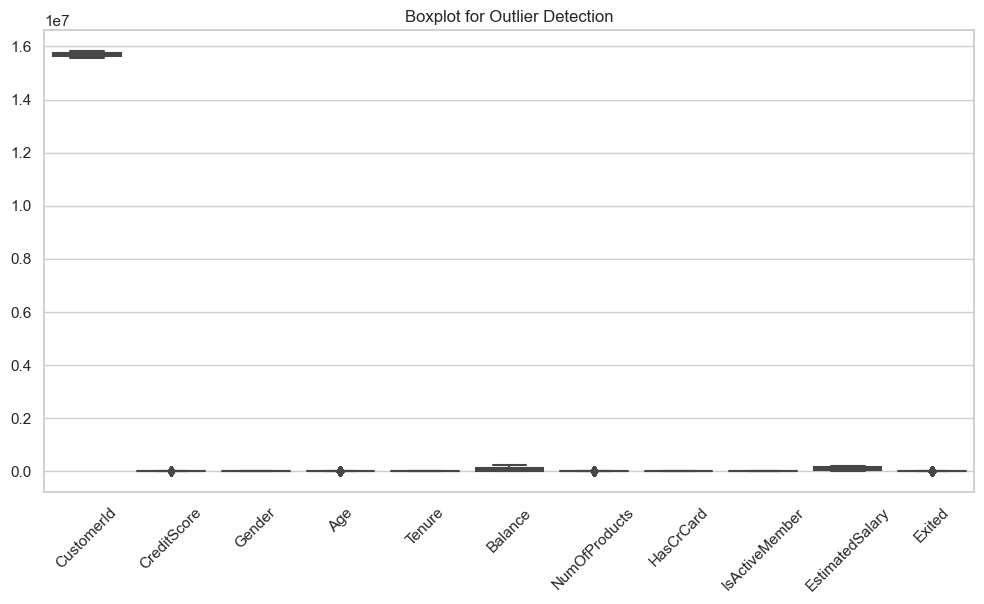

In [8]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title("Boxplot for Outlier Detection")
plt.xticks(rotation=45)
plt.show()

### Correlation Analysis

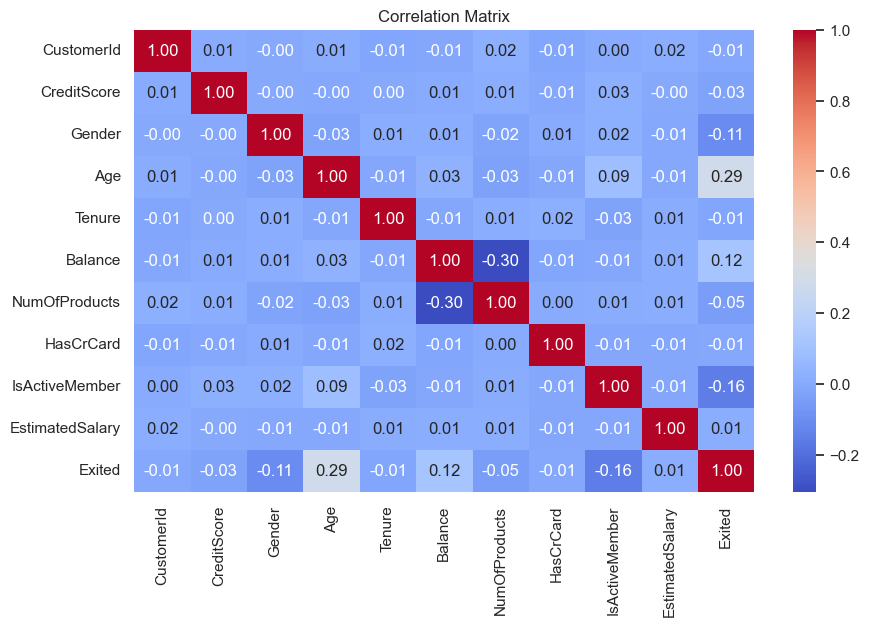

In [9]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


### Scatterplots Between Related Variables

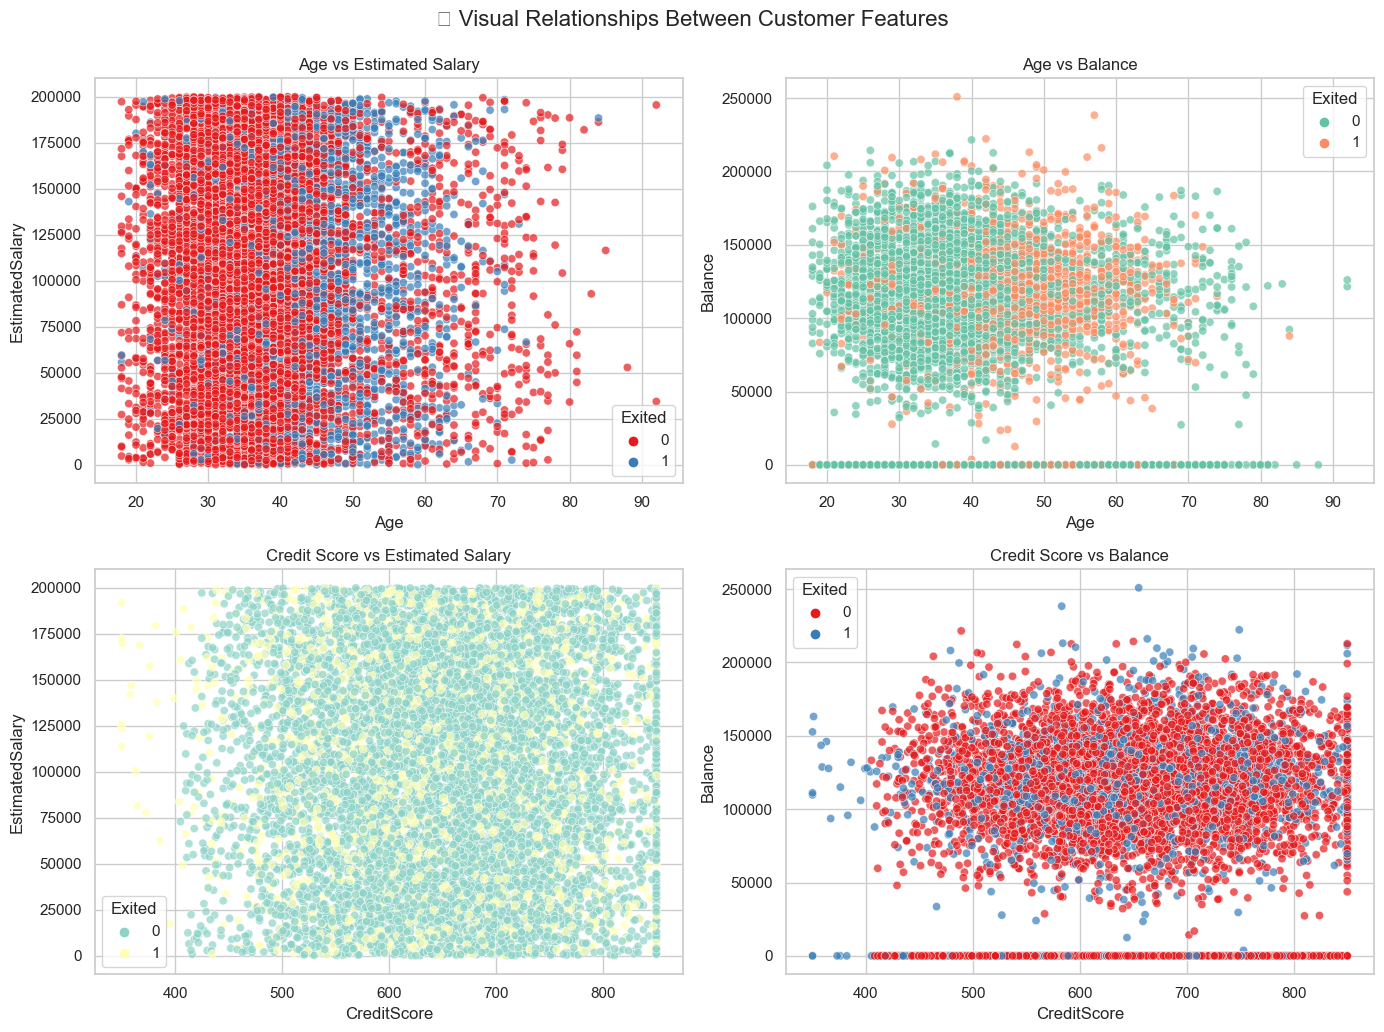

In [18]:
# Set the visual style
sns.set(style="whitegrid")

# Create figure with subplots
plt.figure(figsize=(14, 10))

# Age vs Estimated Salary
plt.subplot(2, 2, 1)
sns.scatterplot(data=df, x='Age', y='EstimatedSalary', hue='Exited', palette='Set1', alpha=0.7)
plt.title('Age vs Estimated Salary')

# Age vs Balance
plt.subplot(2, 2, 2)
sns.scatterplot(data=df, x='Age', y='Balance', hue='Exited', palette='Set2', alpha=0.7)
plt.title('Age vs Balance')

# Credit Score vs Estimated Salary
plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x='CreditScore', y='EstimatedSalary', hue='Exited', palette='Set3', alpha=0.7)
plt.title('Credit Score vs Estimated Salary')

# Credit Score vs Balance
plt.subplot(2, 2, 4)
sns.scatterplot(data=df, x='CreditScore', y='Balance', hue='Exited', palette='Set1', alpha=0.7)
plt.title('Credit Score vs Balance')

plt.tight_layout()
plt.suptitle("🔍 Visual Relationships Between Customer Features", fontsize=16, y=1.03)
plt.show()


### Skewness & Kurtosis (Third & Fourth Moment)

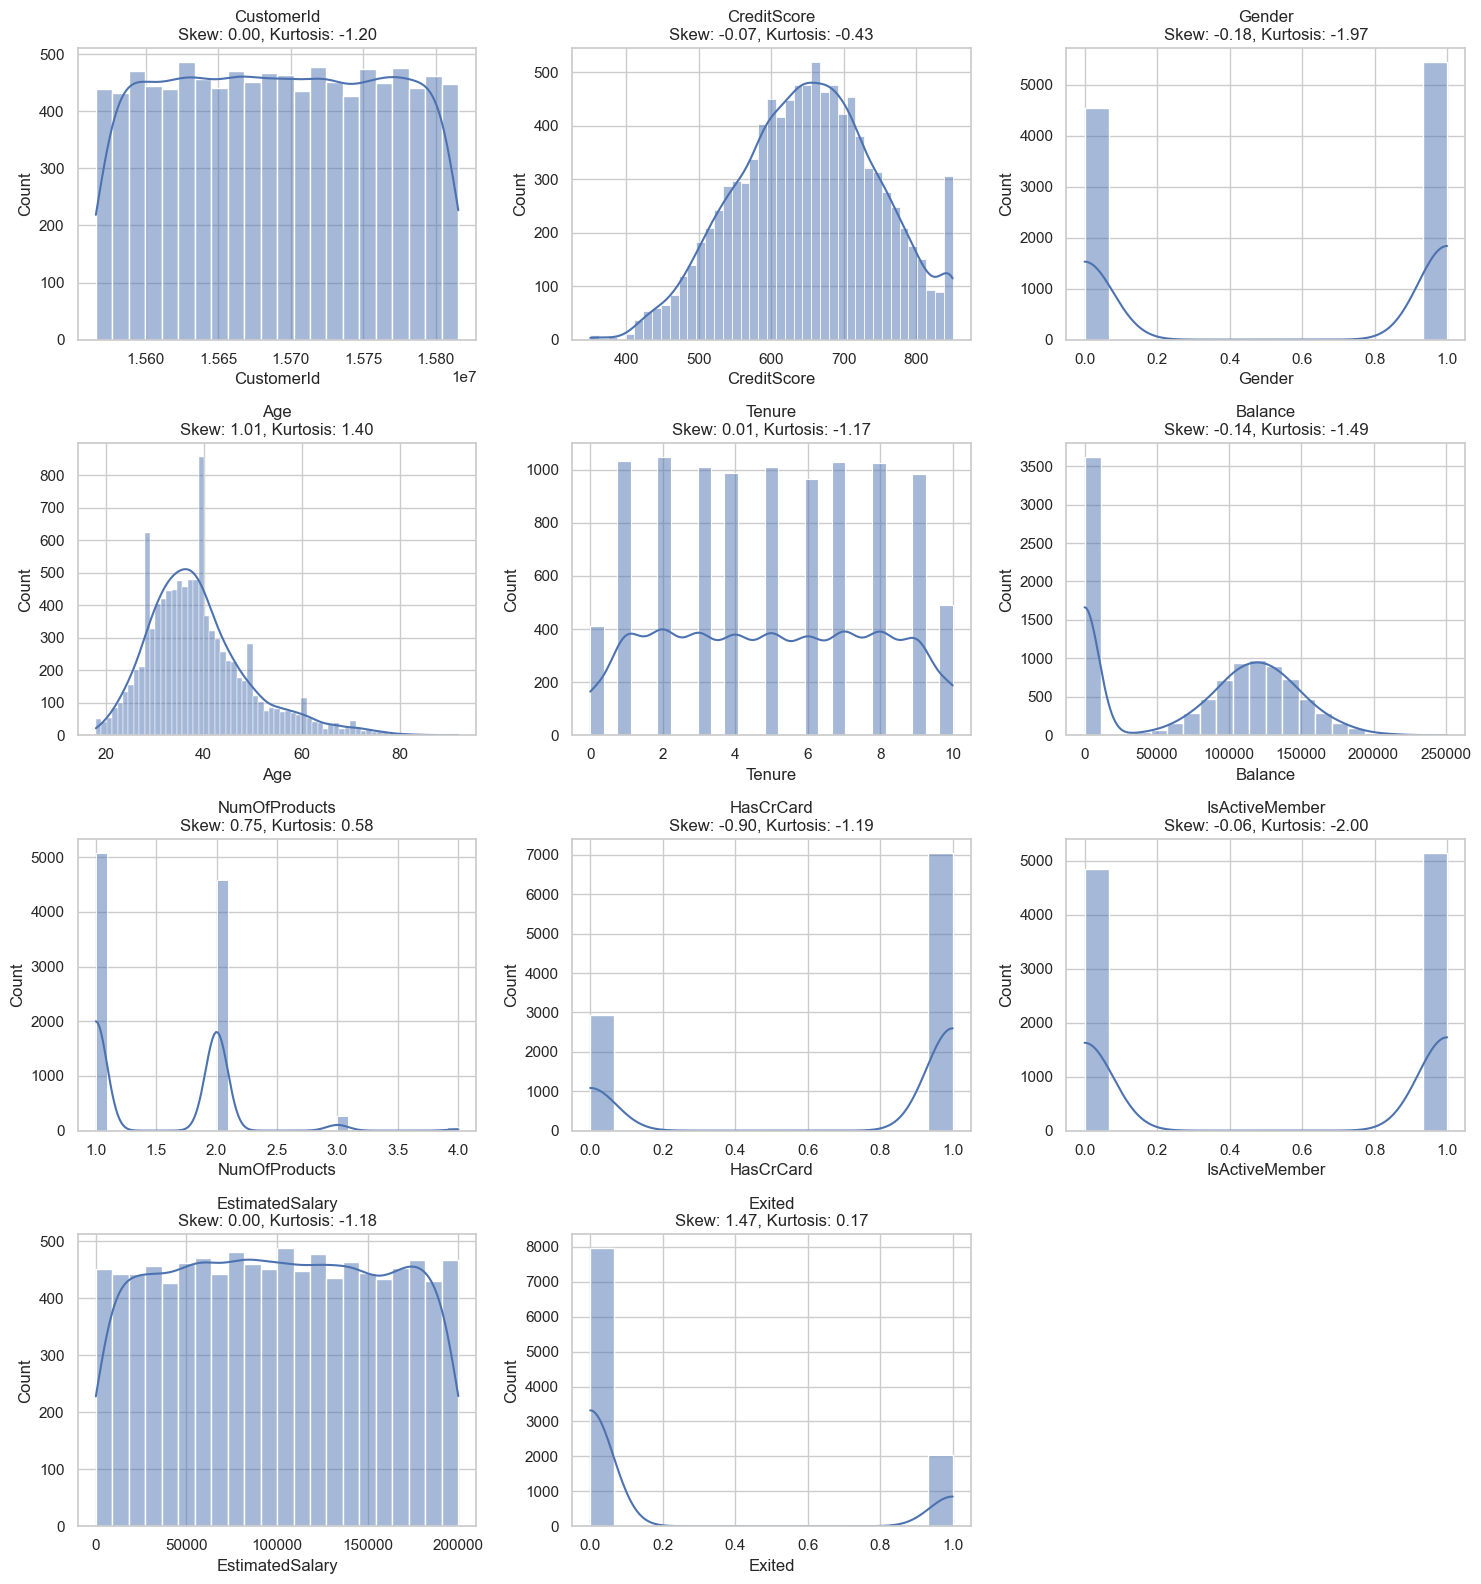

In [13]:
import math

num_cols = df.select_dtypes(include=np.number).columns.tolist()
n = len(num_cols)
cols = 3
rows = math.ceil(n / cols)

plt.figure(figsize=(cols * 5, rows * 4))

for i, col in enumerate(num_cols):
    plt.subplot(rows, cols, i + 1)
    sns.histplot(df[col], kde=True)
    skew = df[col].skew()
    kurt = df[col].kurt()
    plt.title(f"{col}\nSkew: {skew:.2f}, Kurtosis: {kurt:.2f}")

plt.tight_layout()
plt.show()


### Normalization

In [14]:
def norm_func(i):
    return (i - i.min()) / (i.max() - i.min())

df_norm = df.copy()
df_norm[num_cols] = df[num_cols].apply(norm_func)
df_norm.head()

,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.275616,0.538,0.0,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1.0
1,0.326454,0.516,0.0,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0
2,0.214421,0.304,0.0,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1.0
3,0.542636,0.698,0.0,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0.0
4,0.688778,1.000,0.0,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0


 ### Churn vs Other Features

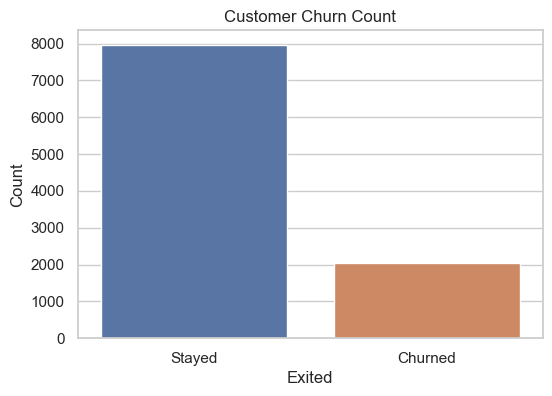

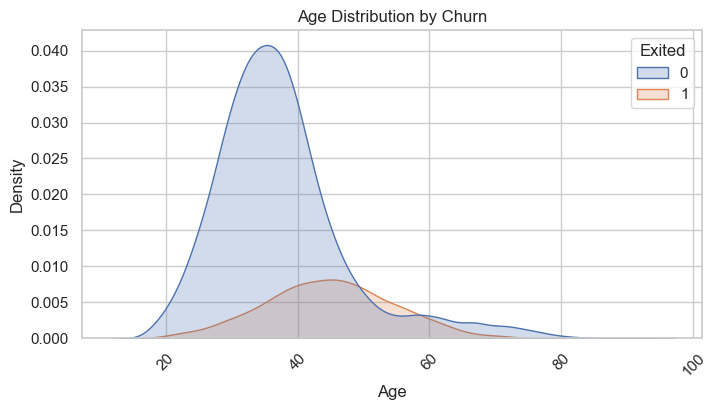

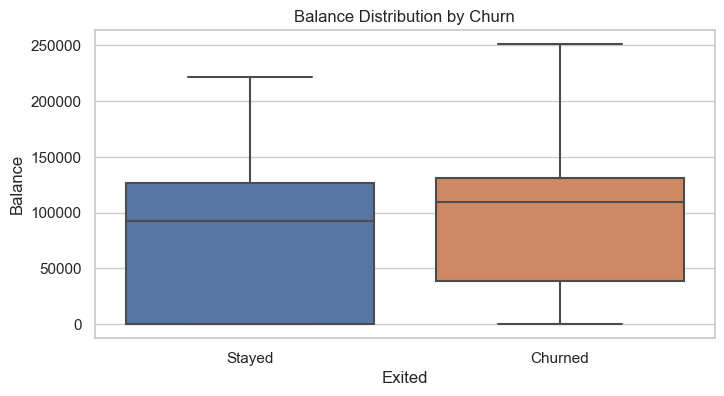

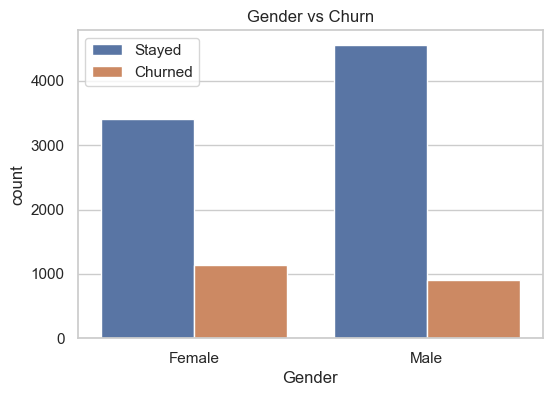

In [15]:
# Count of churned vs not churned
plt.figure(figsize=(6, 4))
sns.countplot(x='Exited', data=df)
plt.title("Customer Churn Count")
plt.xticks([0, 1], ['Stayed', 'Churned'])
plt.ylabel("Count")
plt.show()

# Churn vs Age
plt.figure(figsize=(8, 4))
sns.kdeplot(data=df, x='Age', hue='Exited', fill=True)
plt.title("Age Distribution by Churn")
plt.xticks(rotation=45)
plt.show()

# Churn vs Balance
plt.figure(figsize=(8, 4))
sns.boxplot(x='Exited', y='Balance', data=df)
plt.title("Balance Distribution by Churn")
plt.xticks([0, 1], ['Stayed', 'Churned'])
plt.show()

# Churn vs Gender
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', hue='Exited', data=df)
plt.title("Gender vs Churn")
plt.xticks([0, 1], ['Female', 'Male'])
plt.legend(["Stayed", "Churned"])
plt.show()


### Customer Age Groups

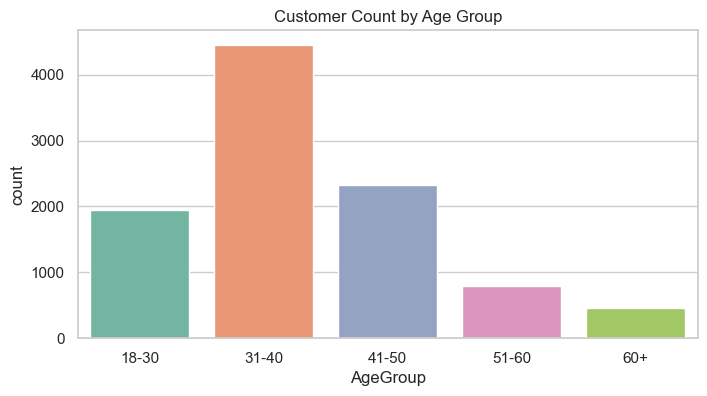

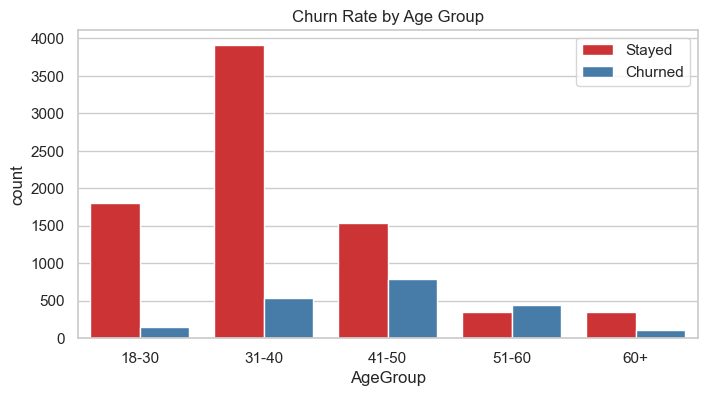

In [16]:
# Creating age bins
bins = [18, 30, 40, 50, 60, 100]
labels = ['18-30', '31-40', '41-50', '51-60', '60+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Count by age group
plt.figure(figsize=(8, 4))
sns.countplot(x='AgeGroup', data=df, palette='Set2')
plt.title("Customer Count by Age Group")
plt.show()

# Churn by age group
plt.figure(figsize=(8, 4))
sns.countplot(x='AgeGroup', hue='Exited', data=df, palette='Set1')
plt.title("Churn Rate by Age Group")
plt.legend(["Stayed", "Churned"])
plt.show()


### Salary Distribution by Gender & Tenure

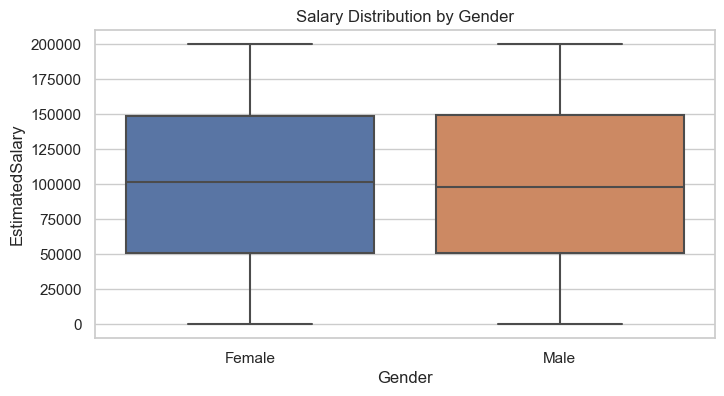

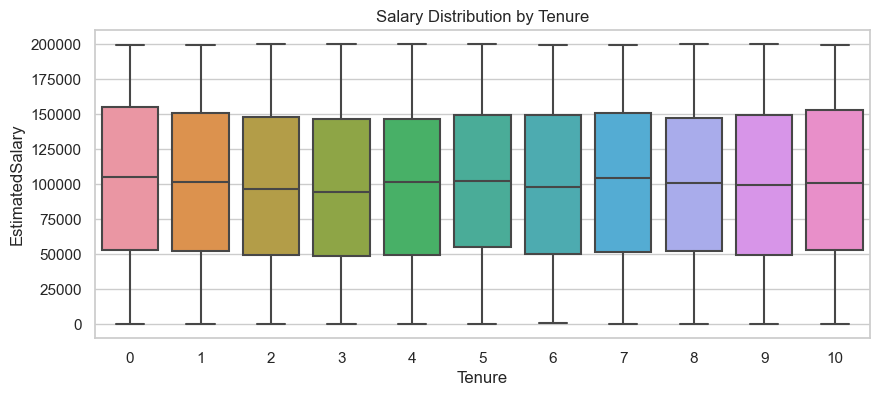

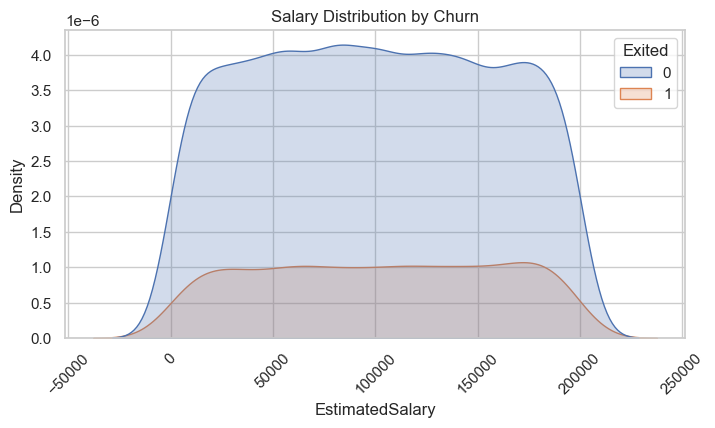

In [17]:
# Salary vs Gender
plt.figure(figsize=(8, 4))
sns.boxplot(x='Gender', y='EstimatedSalary', data=df)
plt.title("Salary Distribution by Gender")
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()

# Salary vs Tenure
plt.figure(figsize=(10, 4))
sns.boxplot(x='Tenure', y='EstimatedSalary', data=df)
plt.title("Salary Distribution by Tenure")
plt.show()

# Salary vs Churn (Optional insight)
plt.figure(figsize=(8, 4))
sns.kdeplot(data=df, x='EstimatedSalary', hue='Exited', fill=True)
plt.title("Salary Distribution by Churn")
plt.xticks(rotation=45)
plt.show()


## Insights Summary

- Most customers have a Credit Score between 600 and 800.
- Estimated Salary and Age have weak correlation.
- A few extreme outliers were found in "Balance".
- The feature "Age" has a right-skewed distribution.
- Gender does not show significant variation in salary.
- Variables like Age and Credit Score are slightly skewed, indicating uneven distribution.
- Kurtosis values help identify peaked or flat distributions.
- Most churned customers are between **40–60 years** old.
- **Higher balance customers** have a slightly higher churn tendency.
- **Male and female customers** have similar salary distributions.
- **Churn is more frequent** in the age groups 41–60.
- **Tenure doesn't show strong variation** in salary, but longer-tenure employees tend to have slightly more consistent salaries.

